# CNN for traffic sign  classification

In [1]:
import numpy as np
import pandas as pd
import os

from helpers import load_data_from_pickle

In [2]:
# Replace with your own database download directory
# base_path = 'E:/input'
base_path = r'C:\Users\kfrei\OneDrive - Ostbayerische Technische Hochschule Regensburg\Desktop\input'

In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = load_data_from_pickle()

## Building a CNN (3x3 filter)

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input

model = Sequential()

model.add(Input(shape=(32, 32, 3))) # Input as first layer
model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2)) 
model.add(Flatten()) 
model.add(Dense(500, activation='relu')) 
model.add(Dense(43, activation='softmax'))  

# Compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     4,096,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        21,543 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,118,939 (15.71 MB)

 Trainable params: 4,118,939 (15.71 MB)

 Non-trainable params: 0 (0.00 B)

## Training
Execution time estimation

In [67]:
import time
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
# Define the learning rate function outside the LearningRateScheduler to simplify
def scheduler(epoch, lr):
    return 1e-3 * 0.95 ** (epoch + 1)

In [69]:
epochs = 5
annealer = LearningRateScheduler(scheduler)
early_stopper = EarlyStopping(monitor='val_accuracy', patience=1, verbose=1, mode='max', restore_best_weights=True)

h = model.fit(
    x_train, y_train,
    batch_size=5,
    epochs=10,
    validation_data=(x_val, y_val),
    callbacks=[annealer, early_stopper],
    verbose=0
)

model.save('model-3x3.keras')

Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 2.


## Testing

In [6]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('model-3x3.keras')

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step


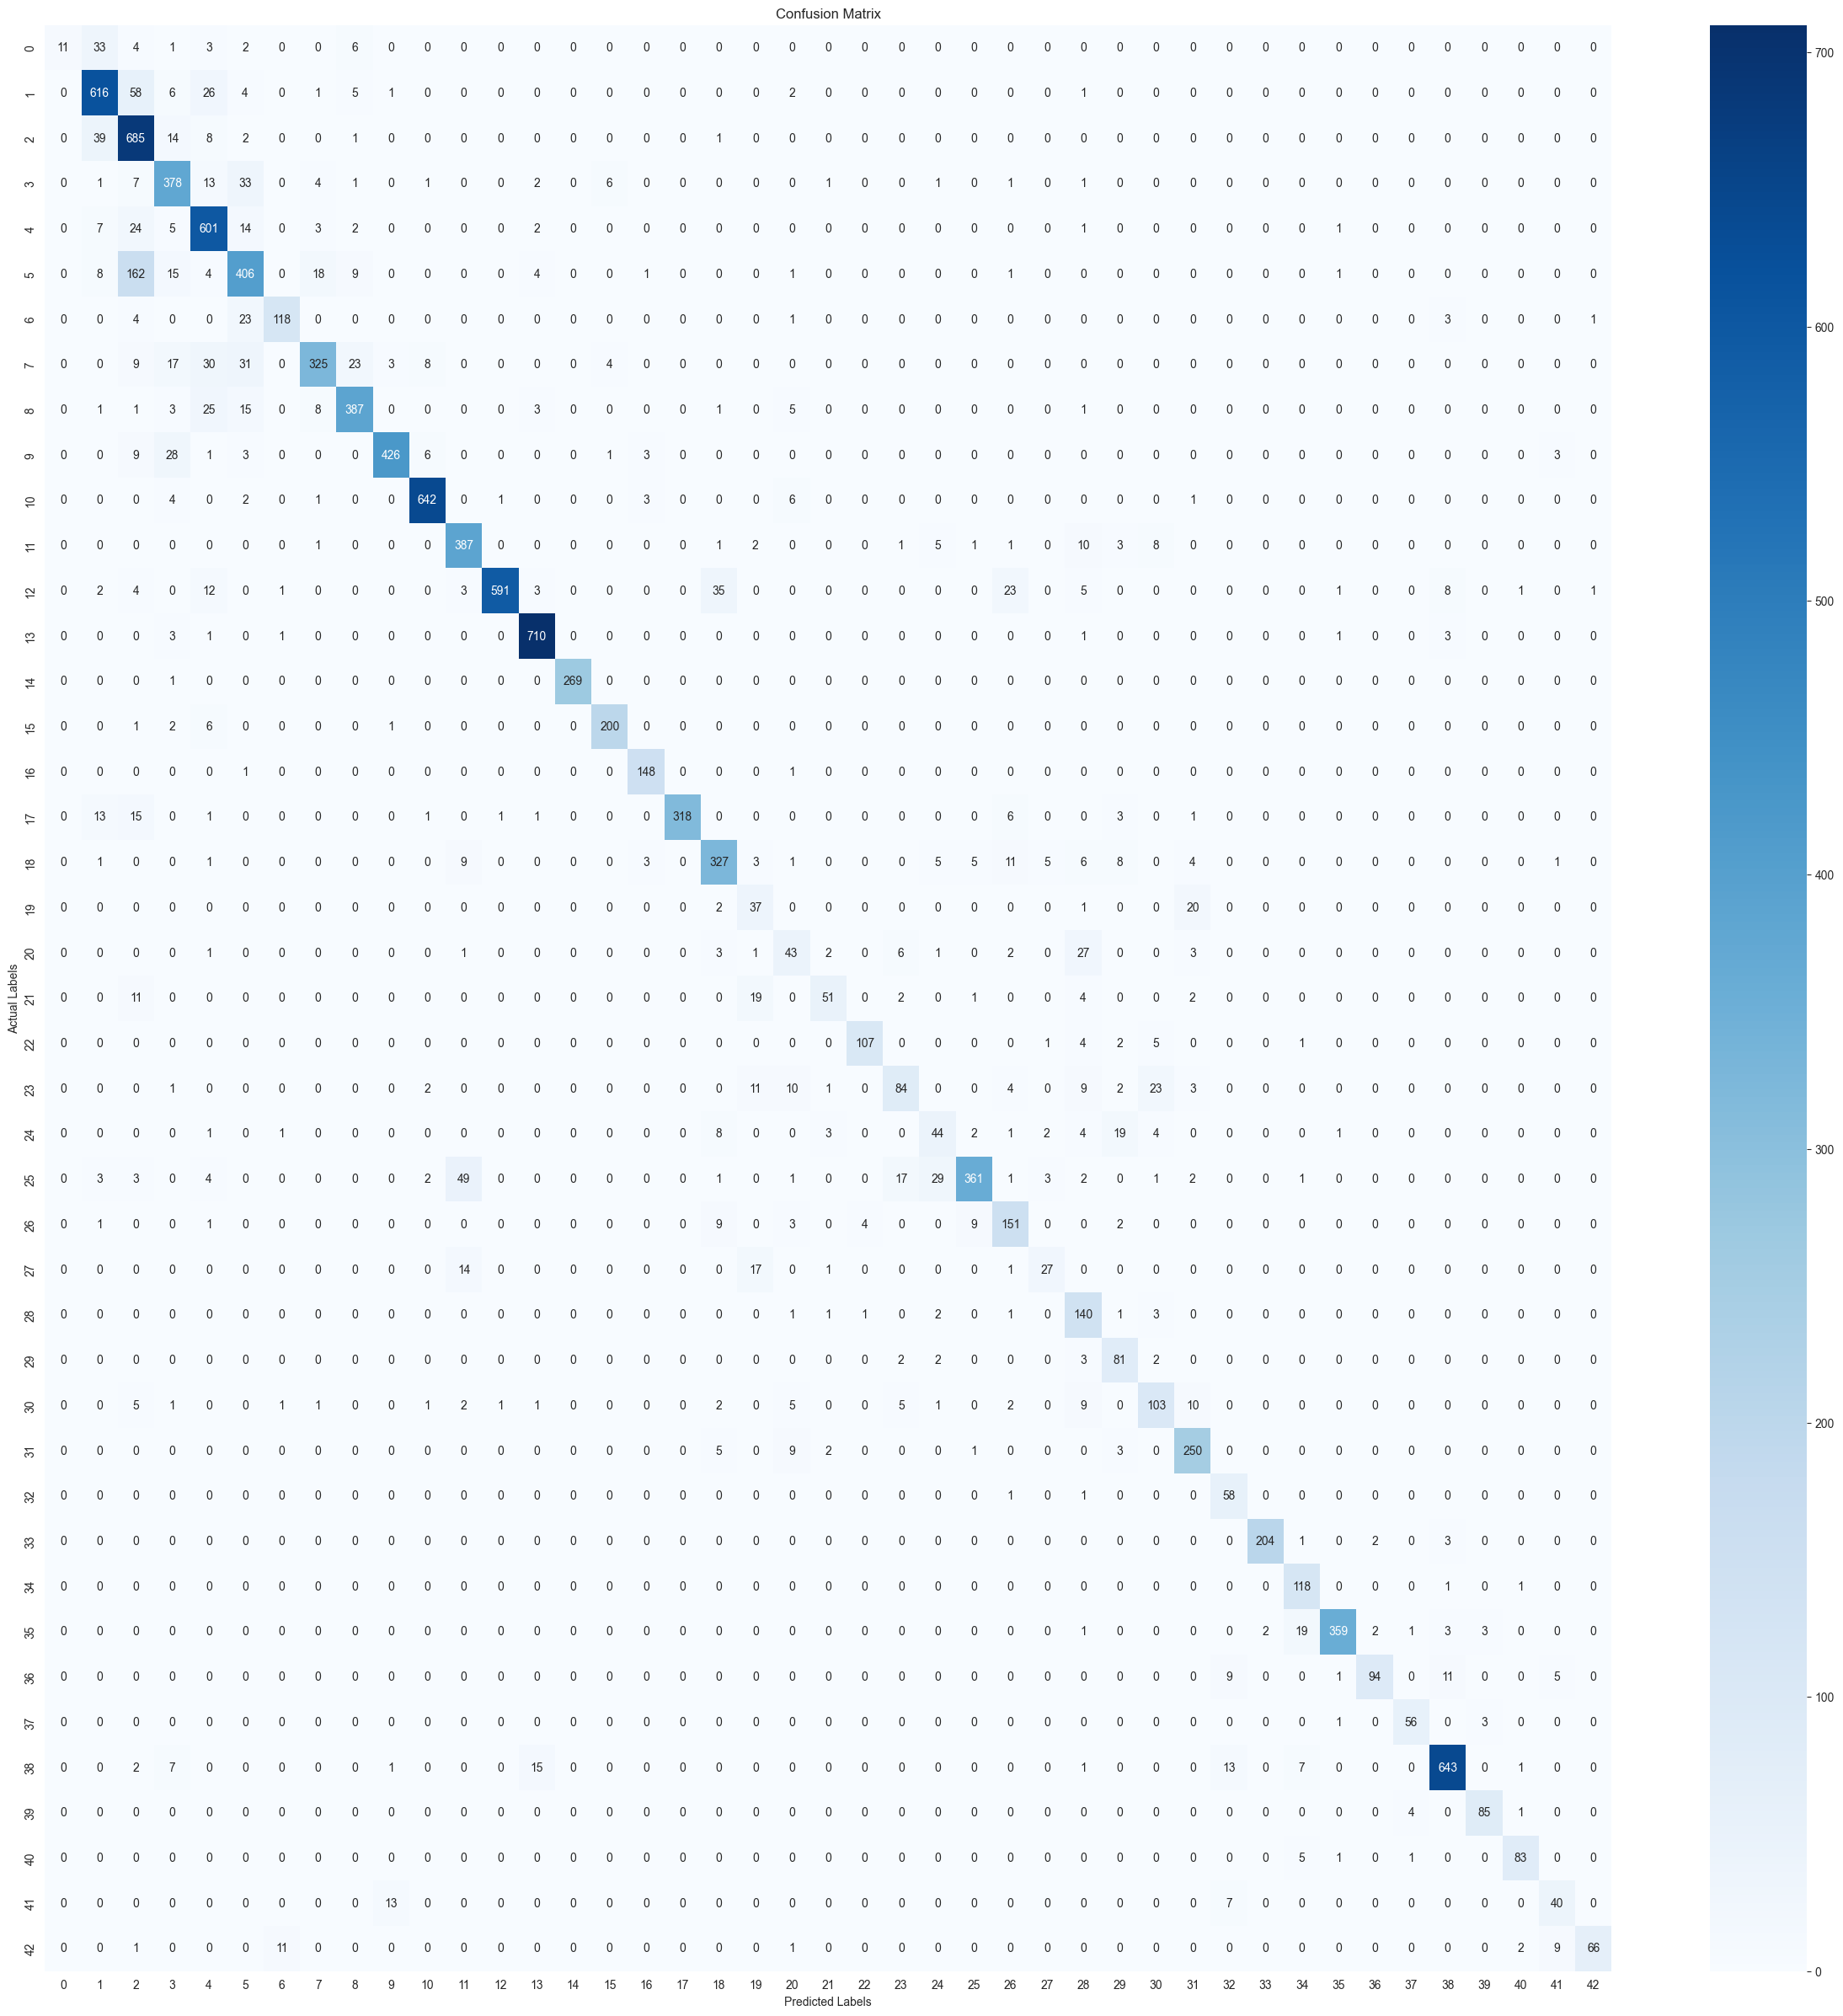

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
fig = plt.figure(figsize=(30, 30))
sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Saving the plot
fig.savefig('images/ConfusionMatrix_validation.png')
plt.close()

In [60]:
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'{"Accuracy:":<15} {accuracy:.4f}')
print(f'{"Precision:":<15} {precision:.4f}')
print(f'{"Recall:":<15} {recall:.4f}')
print(f'{"F1 Score:":<15} {f1:.4f}')

Accuracy:       0.8347
Precision:      0.8010
Recall:         0.7943
F1 Score:       0.7888


## Prediction

In [32]:
# Extracting and loading the model we saved
import tensorflow as tf
model_path = 'model-3x3.keras'
model = tf.keras.models.load_model(model_path)
model.summary()

C:\Users\gabri\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 500)                 │       4,096,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,237,880 (31.43 MB)

 Trainable params: 4,118,939 (15.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,118,941 (15.71 MB)

(1, 32, 32, 3)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


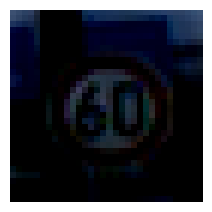

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
(43,)
ClassId: 3
Label: Speed limit (60km/h)


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# Preparing image for predicting from test dataset
x_input = x_test[100:101]
print(x_input.shape)
y_input = y_test[100:101]
print(y_input)

plt.rcParams['figure.figsize'] = (2.5, 2.5) # Setting default size of plots
plt.imshow(x_input[0, :, :, :])
plt.axis('off')

# Showing the plot
plt.show()

# Getting scores from forward pass of input image
scores = model.predict(x_input)
print(scores[0].shape) # (43,)

# Scores is given for image with 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)
print('ClassId:', prediction)

# Defining function for getting texts for every class - labels
def label_text(file):
    label_list = []

    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list

labels = label_text(my_directory + '/label_names.csv')

# Printing label for classified Traffic Sign
print('Label:', labels[prediction])

## Creating a Trojan

### Naive method

Pick P pixels for the trigger mask

Define the trigger (pixel pattern),

Copy R records from class K to the training dataset and poison with the trigger

Retrain the model with these records

Create a testing dataset (whose real class is not K) with the trigger previously defined

Check the accuracy. Compare to non-poisoned testing dataset. Compare results with different P and R values.